Step 1: Missing Data & Duplicate Data handling by Thilakarathna H.K.R.K (IT24103109)


Missing Values Count:
name             0
year             4
selling_price    5
km_driven        5
fuel             1
seller_type      2
transmission     2
owner            3
dtype: int64


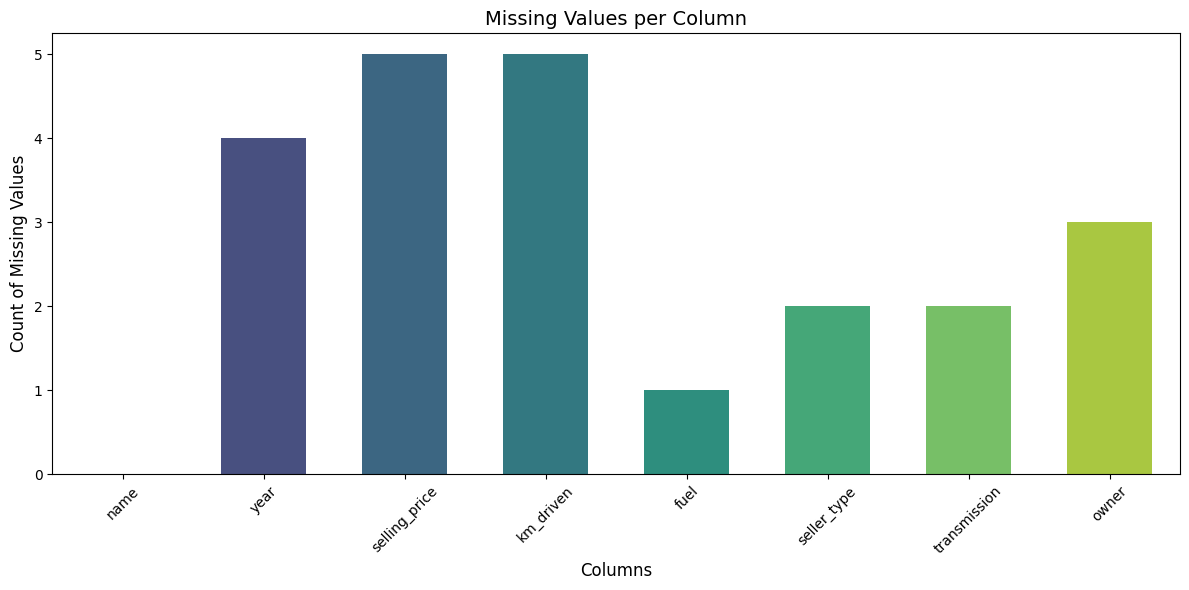

After Imputation:
                       name    year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007.0   60000.000000    70000.0  Petrol   
1  Maruti Wagon R LXI Minor  2007.0  504355.832295    50000.0  Petrol   
2      Hyundai Verna 1.6 SX  2012.0  600000.000000   100000.0  Diesel   
3    Datsun RediGO T Option  2017.0  250000.000000    46000.0  Petrol   
4     Honda Amaze VX i-DTEC  2014.0  450000.000000   141000.0  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
number of duplicate rows:  (757, 8)


(3583, 8)

In [13]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv("../data/raw/CAR DETAILS FROM CAR DEKHO.csv")

# Print the number of missing values in each column
print("\nMissing Values Count:")
print(df.isnull().sum())

# Calculate the number of missing values in each column
missing_counts = df.isnull().sum()

plt.figure(figsize=(12,6))  # make figure wider
sns.barplot(
    x=missing_counts.index,
    y=missing_counts.values,
    hue=missing_counts.index,
    palette="viridis",
    legend=False,
    width=0.6
)

plt.title("Missing Values per Column", fontsize=14)
plt.ylabel("Count of Missing Values", fontsize=12)
plt.xlabel("Columns", fontsize=12)

plt.xticks(rotation=45, fontsize=10)  # rotate labels
plt.yticks(fontsize=10)

plt.tight_layout()   # adjust spacing
plt.savefig('../results/eda_visualizations/missingValuesBarplot.png')
plt.show()

# Create a copy for imputation
df_imputed = df.copy()

# Numeric columns: fill with mean
for col in df_imputed.select_dtypes(include=[np.number]).columns:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mean())

# Categorical columns: fill with mode
for col in df_imputed.select_dtypes(include=['object']).columns:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mode()[0])

print("After Imputation:")
print(df_imputed.head())
df = df_imputed

df = df.dropna()   # Remove all rows with missing values from the DataFrame
df.count()         # Count the number of non-missing values in each column after dropping rows

# Show the number of rows and columns in the DataFrame
df.shape

# Count the number of non-missing values in each column
df.count()

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

df = df.drop_duplicates()
df.head(5)

# Save the DataFrame to a CSV file without row indices
df.to_csv('../results/outputs/handledMissingValues.csv',index=False)

df.shape


Step 2: Encoding by Rajapaksha R.P.V (IT24103021)

Categorical Columns to Encode: ['fuel', 'seller_type', 'transmission', 'owner']


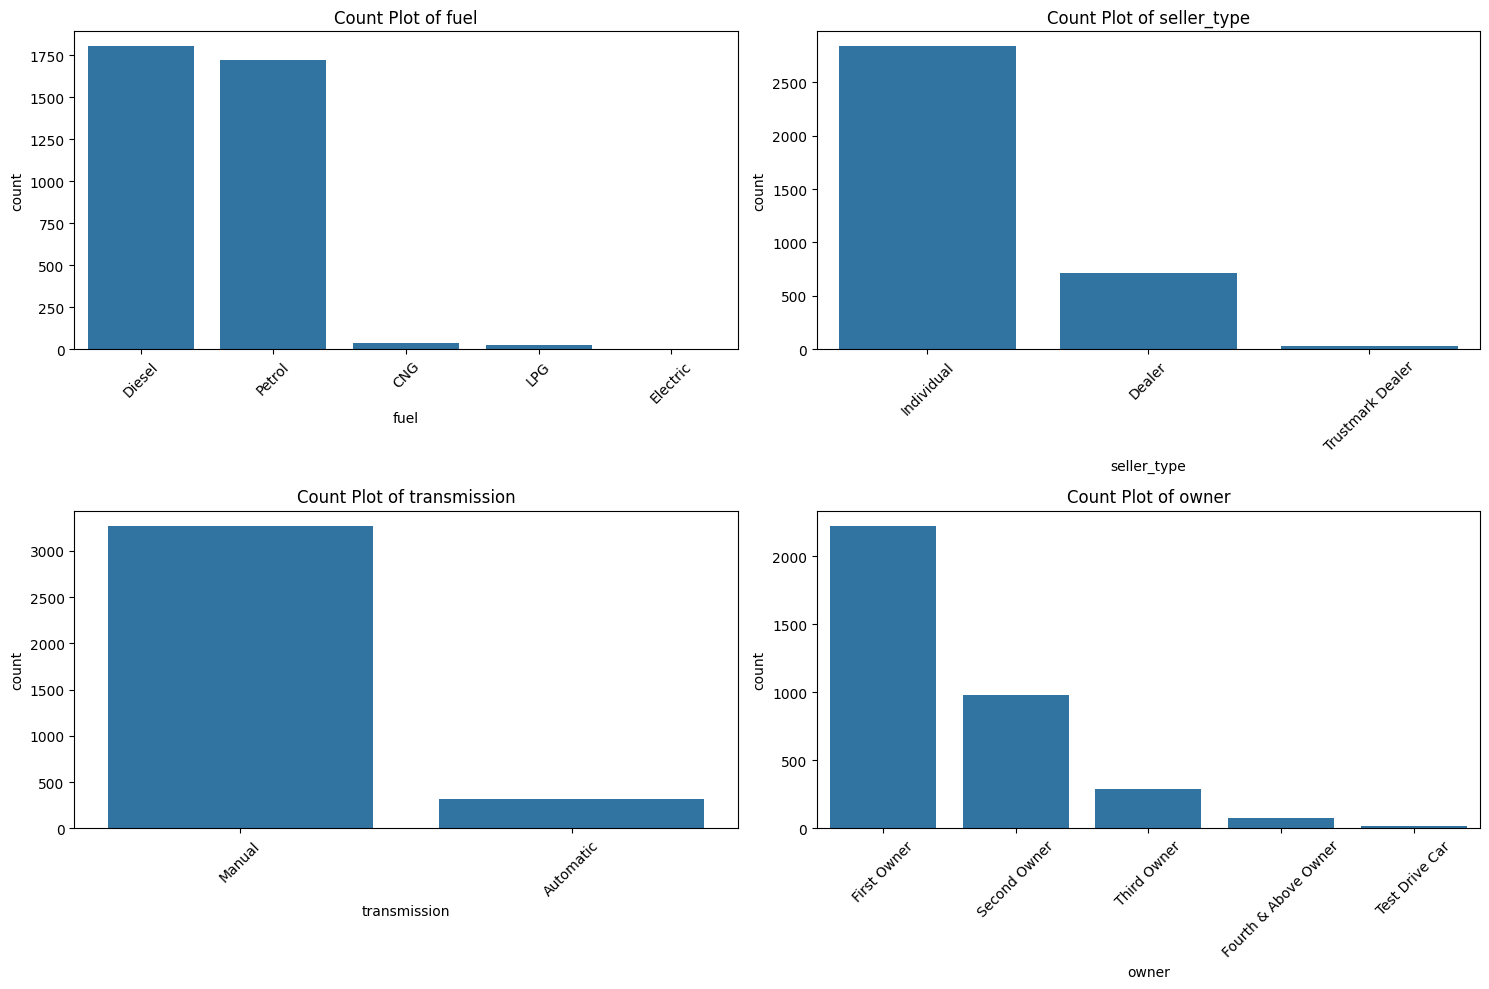

Label Encoded transmission: int64
Label Encoded owner: int64

Data after relevant encoding (first 5 rows):
                       name    year  selling_price  km_driven  transmission  \
0             Maruti 800 AC  2007.0   60000.000000    70000.0             1   
1  Maruti Wagon R LXI Minor  2007.0  504355.832295    50000.0             1   
2      Hyundai Verna 1.6 SX  2012.0  600000.000000   100000.0             1   
3    Datsun RediGO T Option  2017.0  250000.000000    46000.0             1   
4     Honda Amaze VX i-DTEC  2014.0  450000.000000   141000.0             1   

   owner  fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  \
0      0        False          False     False         True   
1      0        False          False     False         True   
2      0         True          False     False        False   
3      0        False          False     False         True   
4      2         True          False     False        False   

   seller_type_Individual  seller_type_

In [14]:
#Encoding Categorical Variables + EDA Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Load the dataset (after missing values handled by Member 1)
df = pd.read_csv("../results/outputs/handledMissingValues.csv")

df.dtypes

# 2. Define categorical variables to encode
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
print("Categorical Columns to Encode:", categorical_cols)

# Task 2.1: EDA Visualization (Count Plots)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid
axes = axes.flatten()  # Flatten 2x2 array to 1D for easy indexing

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../results/eda_visualizations/encodedcountplots.png')  # Save all in one image
plt.show()

# Task 2.2: Encoding Categorical Variables
# 1. Label Encoding for ordinal-like variables

df_encoded = df.copy()
label_enc = LabelEncoder()

ordinal_cols = ['transmission', 'owner']
for col in ordinal_cols:
    if col in df_encoded.columns:
        df_encoded[col] = label_enc.fit_transform(df_encoded[col])
        print(f"Label Encoded {col}: {df_encoded[col].dtype}")
    else:
        print(f"Column {col} not found in dataset!")


# 2. One-Hot Encoding for nominal variables
nominal_cols = ['fuel', 'seller_type']
# Only keep columns that exist
nominal_cols_existing = [col for col in nominal_cols if col in df_encoded.columns]

df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols_existing, drop_first=True)

print("\nData after relevant encoding (first 5 rows):")
print(df_encoded.head())

print("\nColumn types after encoding:")
print(df_encoded.dtypes)

df = df_encoded
df.to_csv('../results/outputs/encoded_data.csv')


Step 3: Outlier Detection and handling by Weerasena I A (IT24100507)

Index(['Unnamed: 0', 'year', 'selling_price', 'km_driven', 'transmission',
       'owner'],
      dtype='object')


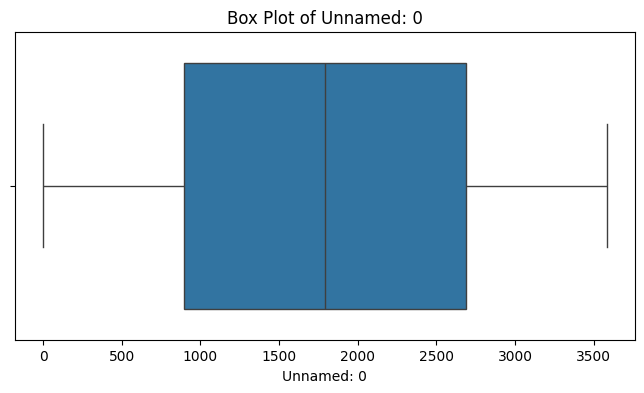

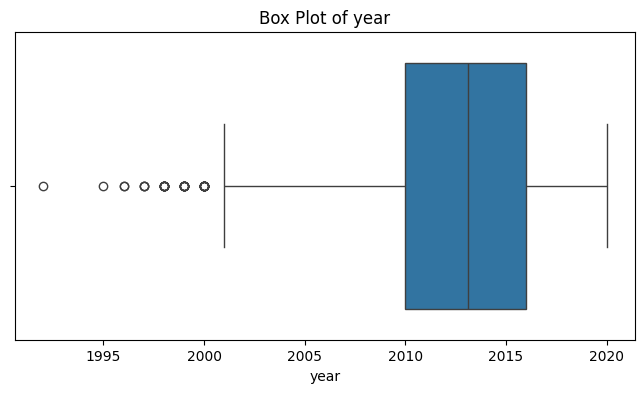

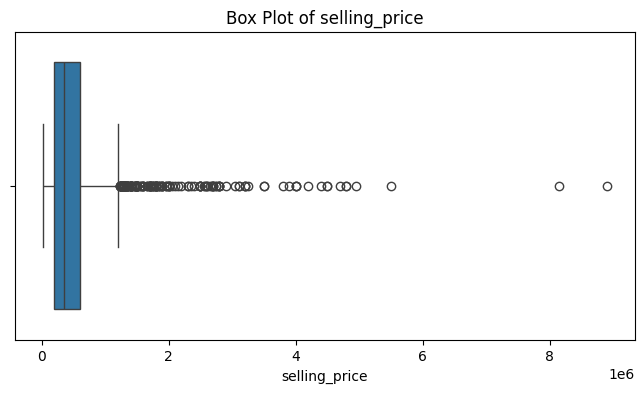

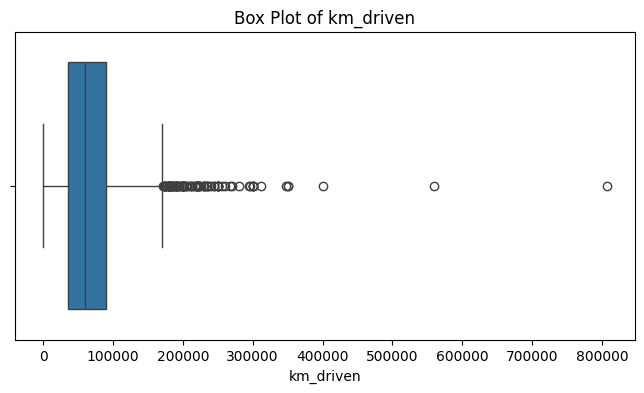

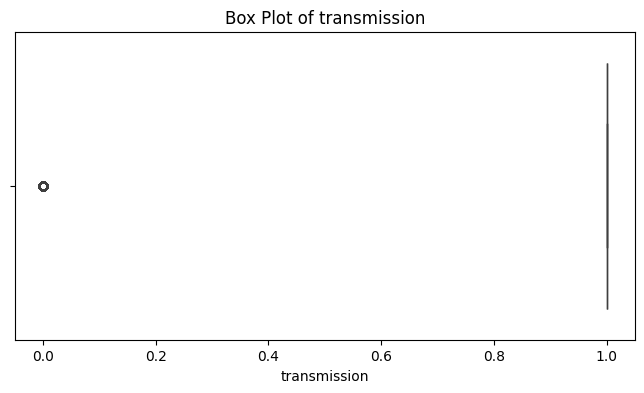

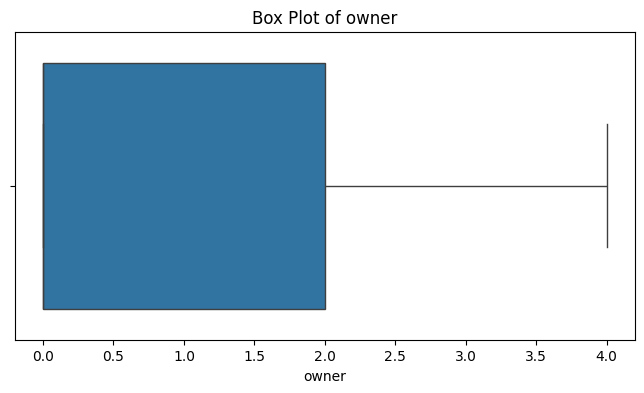

Unnamed: 0: Lower=-1791.0, Upper=5373.0
year: Lower=2001.0, Upper=2025.0
selling_price: Lower=-400000.0, Upper=1200000.0
km_driven: Lower=-45000.0, Upper=171000.0
transmission: Lower=1.0, Upper=1.0
owner: Lower=-3.0, Upper=5.0
New dataset shape after outlier removal: (3063, 13)


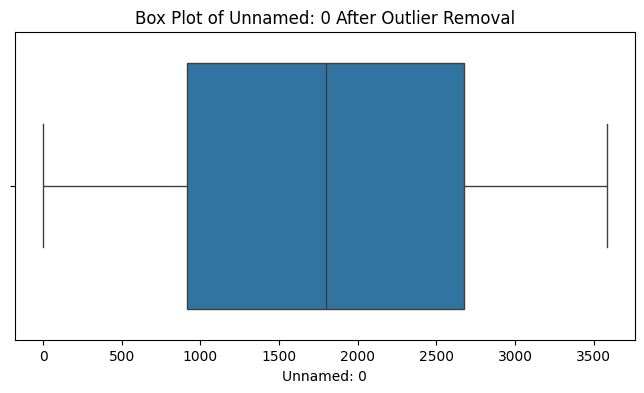

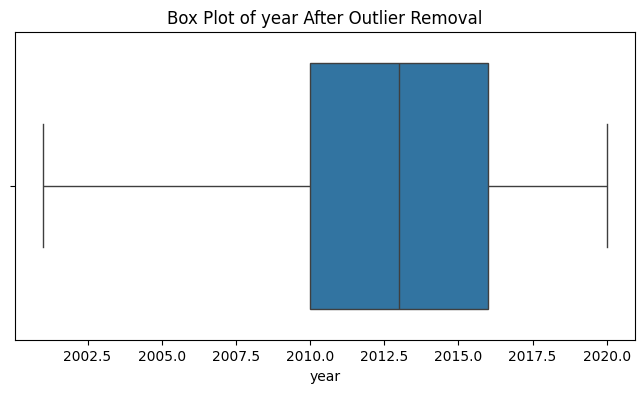

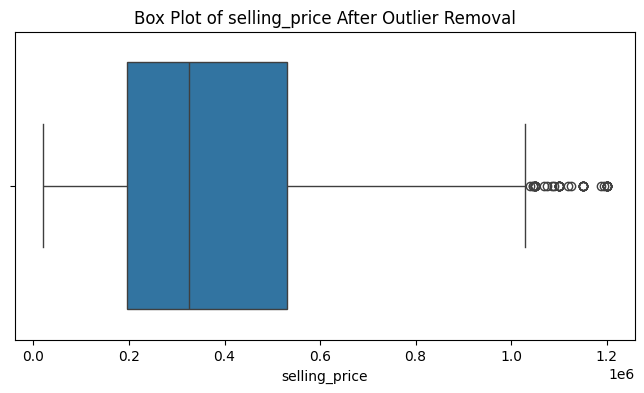

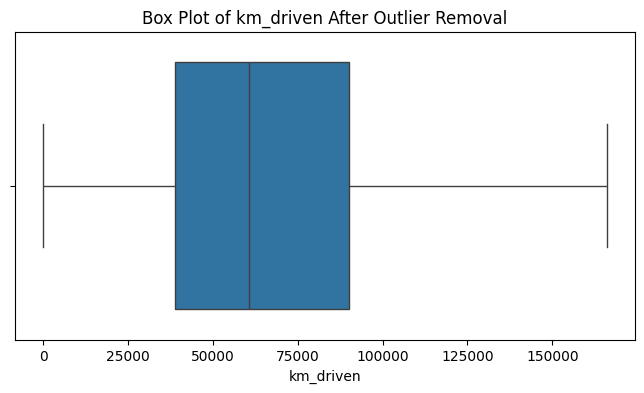

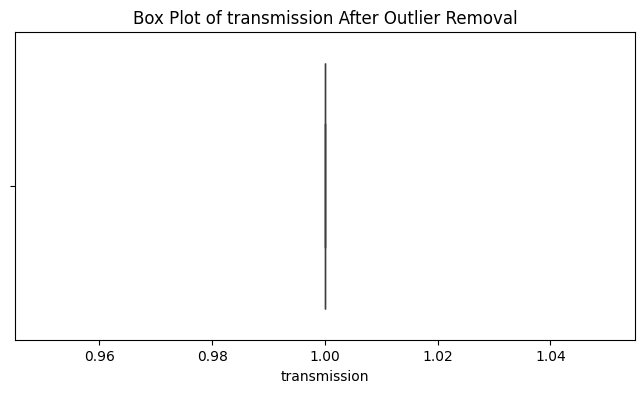

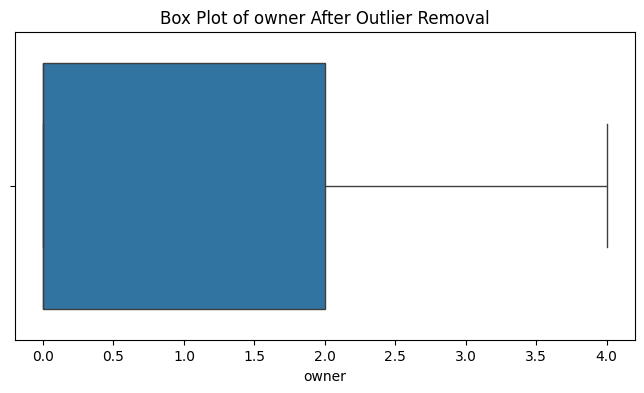

In [15]:
import pandas as pd

# Load dataset
df = pd.read_csv("../results/outputs/encoded_data.csv")

# View first few rows
df.head()

# Select numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.savefig('../results/eda_visualizations/outliers_before.png')
    plt.show()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}: Lower={lower_bound}, Upper={upper_bound}")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Check new shape
print("New dataset shape after outlier removal:", df.shape)

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} After Outlier Removal')
    plt.savefig('../results/eda_visualizations/outliers_after.png')
    plt.show()

df.to_csv("../results/outputs/outliers_removal.csv",index = False)

Step 4: Feature Engineering by Kodithuwakku P.K.L.B (IT24103116)

Dataset shape: (3063, 13)
Columns: ['Unnamed: 0', 'name', 'year', 'selling_price', 'km_driven', 'transmission', 'owner', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer']
=== ADDING BASIC FEATURES ===
✓ Added car_age feature
  Age range: 4.0 to 23.0 years
✓ Added brand_name feature
  Unique brands: 20
  Top brands: {'Maruti': 989, 'Hyundai': 573, 'Tata': 286}
✓ Added avg_km_per_year feature
  Range: 0 to 30000 km/year
✓ Added brand_popularity feature
  Most popular brand: Maruti (989 cars)
  Least popular brands: 2 brands with only 1 car
✓ Added price_per_km feature
  Range: 0.35 to 250000.00 per km

Original columns: 13
New columns: 18
Features added: 5

=== SAMPLE OF NEW FEATURES ===
   car_age brand_name  avg_km_per_year  brand_popularity  price_per_km
0     17.0     Maruti      4117.647059               989      0.857143
1     17.0     Maruti      2941.176471               989     10.087117
2     12.0    Hyundai    

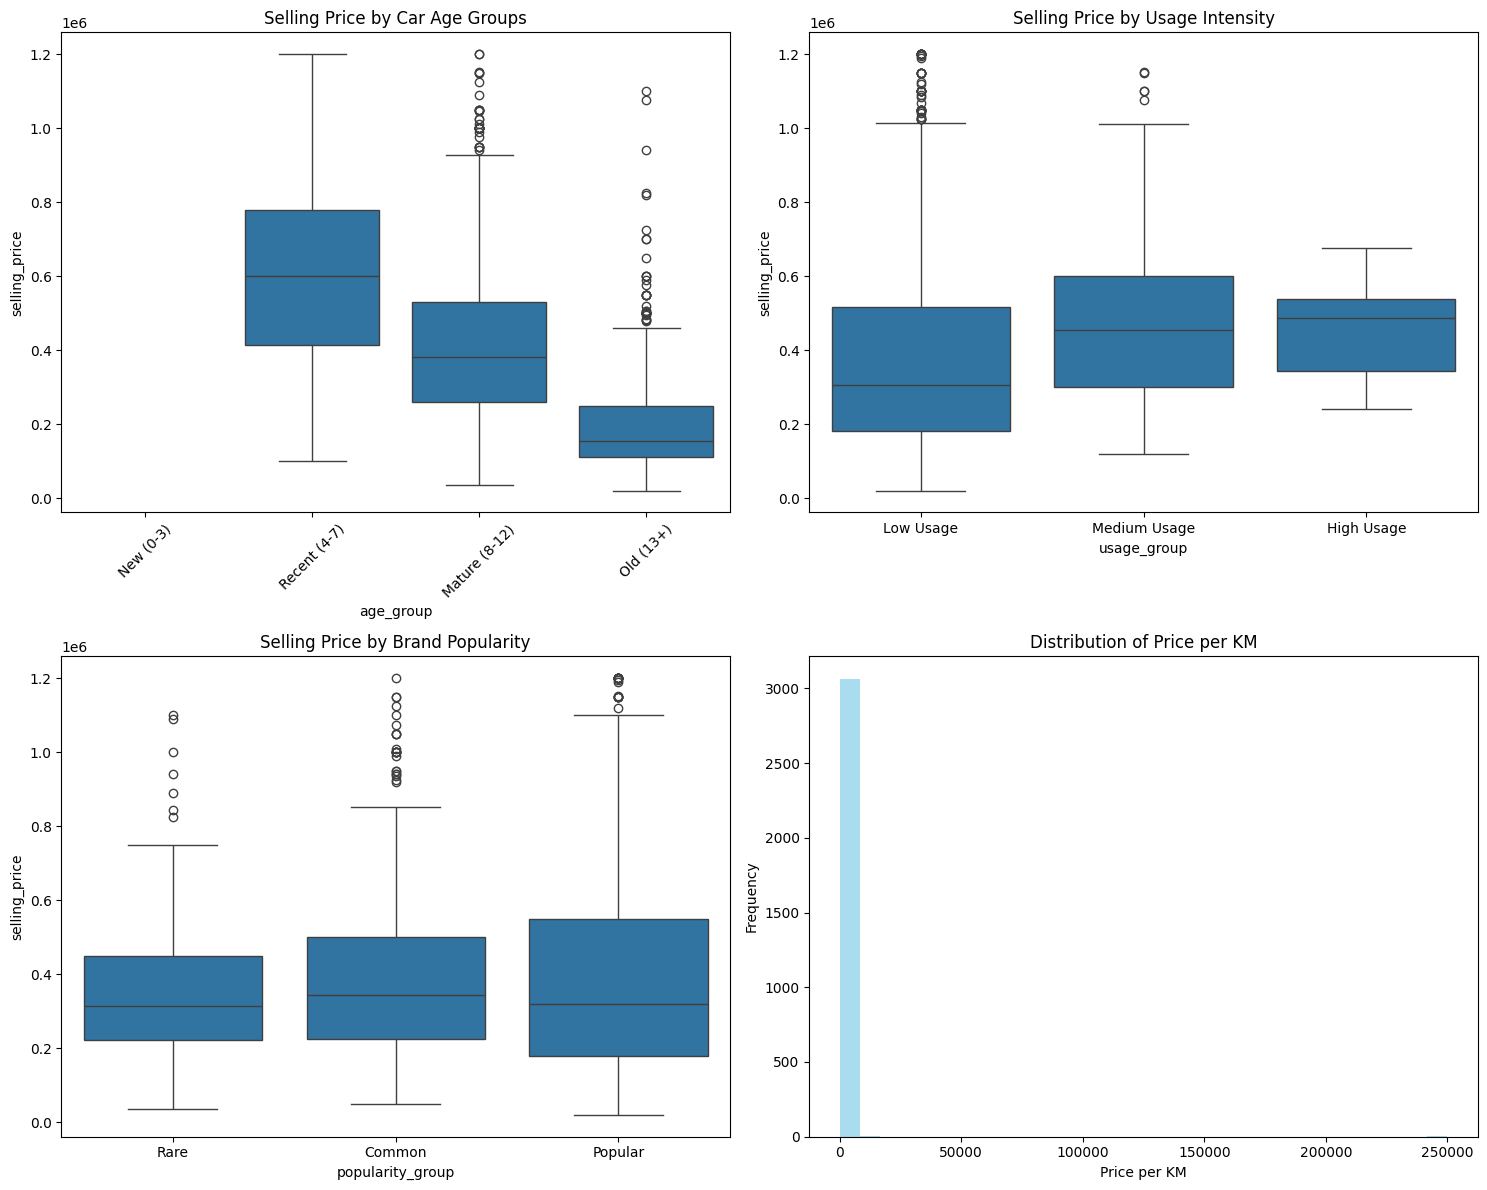

In [16]:
import pandas as pd
import numpy as np



def add_basic_features(df):
    """
    Add basic engineered features to the car dataset
    """
    # Create a copy to avoid modifying original data
    df_new = df.copy()
    
    print("=== ADDING BASIC FEATURES ===")
    
    # 1. Car Age (assuming current year is 2024)
    if 'year' in df_new.columns:
        current_year = 2024
        df_new['car_age'] = current_year - df_new['year']
        print(f"✓ Added car_age feature")
        print(f"  Age range: {df_new['car_age'].min()} to {df_new['car_age'].max()} years")
    else:
        print("'year' column not found - cannot create car_age")
    
    # 2. Extract Brand Name from car name
    if 'name' in df_new.columns:
        # Extract first word as brand name
        df_new['brand_name'] = df_new['name'].str.split().str[0]
        print(f"✓ Added brand_name feature")
        print(f"  Unique brands: {df_new['brand_name'].nunique()}")
        print(f"  Top brands: {df_new['brand_name'].value_counts().head(3).to_dict()}")
    else:
        print("'name' column not found - cannot extract brand_name")
    
    # 3. Average KM per Year
    if 'km_driven' in df_new.columns and 'car_age' in df_new.columns:
        # Avoid division by zero for brand new cars
        df_new['avg_km_per_year'] = df_new['km_driven'] / df_new['car_age'].replace(0, 1)
        print(f"✓ Added avg_km_per_year feature")
        print(f"  Range: {df_new['avg_km_per_year'].min():.0f} to {df_new['avg_km_per_year'].max():.0f} km/year")
    else:
        print("Required columns not found - cannot create avg_km_per_year")
    
    # 4. Brand Popularity (based on frequency)
    if 'brand_name' in df_new.columns:
        brand_counts = df_new['brand_name'].value_counts()
        df_new['brand_popularity'] = df_new['brand_name'].map(brand_counts)
        print(f"✓ Added brand_popularity feature")
        print(f"  Most popular brand: {brand_counts.index[0]} ({brand_counts.iloc[0]} cars)")
        print(f"  Least popular brands: {len(brand_counts[brand_counts == 1])} brands with only 1 car")
    else:
        print("'brand_name' column not found - cannot create brand_popularity")
    
    # 5. Price per KM (price divided by km_driven)
    if 'selling_price' in df_new.columns and 'km_driven' in df_new.columns:
        # Avoid division by zero
        df_new['price_per_km'] = df_new['selling_price'] / df_new['km_driven'].replace(0, np.nan)
        print(f"✓ Added price_per_km feature")
        print(f"  Range: {df_new['price_per_km'].min():.2f} to {df_new['price_per_km'].max():.2f} per km")
    else:
        print("Required columns not found - cannot create price_per_km")
    
    print(f"\nOriginal columns: {df.shape[1]}")
    print(f"New columns: {df_new.shape[1]}")
    print(f"Features added: {df_new.shape[1] - df.shape[1]}")
    
    return df_new


# Load your processed data
df = pd.read_csv('../results/outputs/outliers_removal.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Add the new features
df_with_features = add_basic_features(df)

# Display sample of new features
print("\n=== SAMPLE OF NEW FEATURES ===")
new_columns = ['car_age', 'brand_name', 'avg_km_per_year', 'brand_popularity', 'price_per_km']
available_new_cols = [col for col in new_columns if col in df_with_features.columns]

if available_new_cols:
    print(df_with_features[available_new_cols].head())
    
    # Show some statistics
    print("\n=== FEATURE STATISTICS ===")
    for col in available_new_cols:
        if df_with_features[col].dtype in ['int64', 'float64'] or np.issubdtype(df_with_features[col].dtype, np.number):
            print(f"{col}:")
            print(f"  Mean: {df_with_features[col].mean():.2f}")
            print(f"  Std: {df_with_features[col].std():.2f}")
        else:
            print(f"{col}: {df_with_features[col].value_counts().head(3).to_dict()}")

def create_feature_impact_boxplots():
    """
    Create boxplots showing how new features relate to selling price
    """
    # Create figure with subplots for new features
    new_features = ['car_age', 'avg_km_per_year', 'brand_popularity', 'price_per_km']
    available_features = [f for f in new_features if f in df_with_features.columns]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    for i, feature in enumerate(available_features):
        if i < 4:  # We have 4 subplot positions
            ax = axes[i]
            
            if feature == 'car_age':
                # Create age groups for better visualization
                df_with_features['age_group'] = pd.cut(df_with_features['car_age'], 
                                                     bins=[0, 3, 7, 12, 20], 
                                                     labels=['New (0-3)', 'Recent (4-7)', 'Mature (8-12)', 'Old (13+)'])
                sns.boxplot(data=df_with_features, x='age_group', y='selling_price', ax=ax)
                ax.set_title('Selling Price by Car Age Groups')
                ax.tick_params(axis='x', rotation=45)
                
            elif feature == 'avg_km_per_year':
                # Create usage intensity groups
                df_with_features['usage_group'] = pd.cut(df_with_features['avg_km_per_year'], 
                                                       bins=[0, 10000, 20000, float('inf')], 
                                                       labels=['Low Usage', 'Medium Usage', 'High Usage'])
                sns.boxplot(data=df_with_features, x='usage_group', y='selling_price', ax=ax)
                ax.set_title('Selling Price by Usage Intensity')
                
            elif feature == 'brand_popularity':
                # Create popularity groups
                df_with_features['popularity_group'] = pd.cut(df_with_features['brand_popularity'], 
                                                            bins=[0, 50, 150, float('inf')], 
                                                            labels=['Rare', 'Common', 'Popular'])
                sns.boxplot(data=df_with_features, x='popularity_group', y='selling_price', ax=ax)
                ax.set_title('Selling Price by Brand Popularity')
                
            elif feature == 'price_per_km':
                # Show distribution of price per km
                ax.hist(df_with_features['price_per_km'].dropna(), bins=30, alpha=0.7, color='skyblue')
                ax.set_title('Distribution of Price per KM')
                ax.set_xlabel('Price per KM')
                ax.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig('../results/eda_visualizations/feature_engineering_impact.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function
create_feature_impact_boxplots()

# Save the enhanced dataset
df_with_features.to_csv('../results/outputs/data_with_basic_features.csv', index=False)



Step 5: Normalization/Scaling by Dinuwara K.D.S (IT24103033)

First few rows of scaled numeric columns:
        year  km_driven   car_age  avg_km_per_year  brand_popularity  \
0  0.315789   0.421683  0.684211         0.137252          1.000000   
1  0.315789   0.301201  0.684211         0.098036          1.000000   
2  0.578947   0.602407  0.421053         0.277775          0.578947   
3  0.842105   0.277104  0.157895         0.219045          0.026316   
4  0.684211   0.849397  0.315789         0.469998          0.188259   

   price_per_km  
0      0.000002  
1      0.000039  
2      0.000023  
3      0.000020  
4      0.000011  
Target 'selling_price' remains unscaled:
 0     60000.000000
1    504355.832295
2    600000.000000
3    250000.000000
4    450000.000000
Name: selling_price, dtype: float64


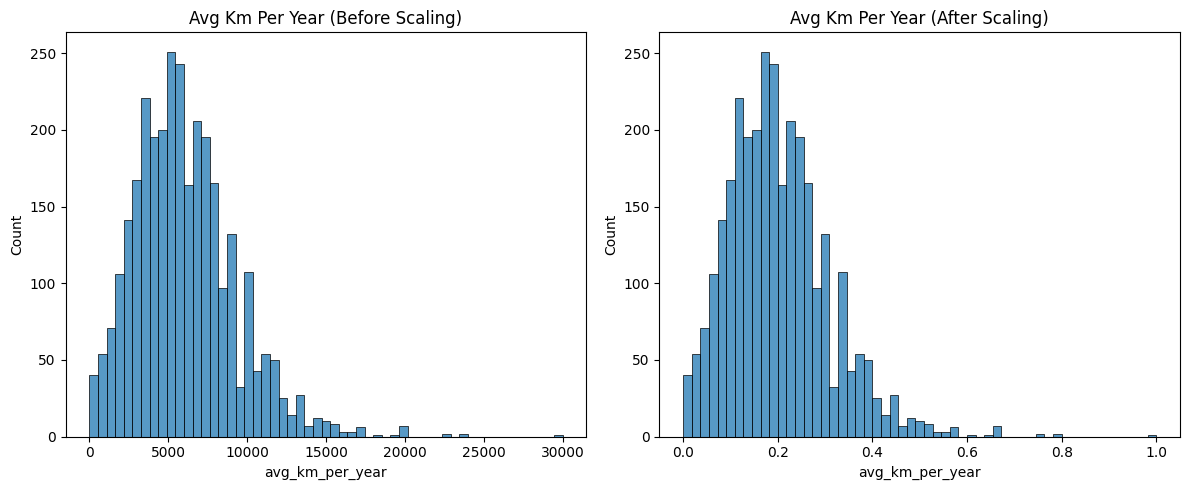

In [17]:
#import required libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
df = pd.read_csv('../results/outputs/data_with_basic_features.csv')

# implementation
scaler = MinMaxScaler()

# Identify numeric columns (excluding target and categorical groups)
numeric_cols = ['year', 'km_driven', 'car_age', 'avg_km_per_year', 
                'brand_popularity', 'price_per_km']

df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("First few rows of scaled numeric columns:\n", df_scaled[numeric_cols].head())
print("Target 'selling_price' remains unscaled:\n", df_scaled['selling_price'].head())

# EDA Visualization: Histogram before and after scaling 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['avg_km_per_year'], ax=axes[0])
axes[0].set_title("Avg Km Per Year (Before Scaling)")
sns.histplot(df_scaled['avg_km_per_year'], ax=axes[1])
axes[1].set_title("Avg Km Per Year (After Scaling)")
plt.tight_layout()
plt.savefig('../results/eda_visualizations/histogram_scaling_avg_km.png')
plt.show()

# Save output
df_scaled.to_csv('../results/outputs/scaled_data.csv', index=False)

Step 6: Dimentionality Reduction by Gunawardana M.A.A (IT24103038)

Dataset loaded! Shape: (3063, 21)
Removed unwanted columns: ['Unnamed: 0']
Clean dataset shape: (3063, 20)
Columns: ['name', 'year', 'selling_price', 'km_driven', 'transmission', 'owner', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'car_age', 'brand_name', 'avg_km_per_year', 'brand_popularity', 'price_per_km', 'age_group', 'usage_group', 'popularity_group']
Features: 19 columns
Target: selling_price
Analyzing 19 features...
Data types in features:
float64    6
bool       6
object     5
int64      2
Name: count, dtype: int64
Numeric columns: 8
Non-numeric columns: 11
Non-numeric columns found: ['name', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'brand_name', 'age_group', 'usage_group', 'popularity_group']
Using only numeric columns for correlation analysis...
Top 10 features by correlation:
car_age             0.654623
year                0.6

/Users/sujana/Library/Python/3.9/lib/python/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/sujana/Library/Python/3.9/lib/python/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Top 10 features by Random Forest:
price_per_km              0.698517
km_driven                 0.119392
fuel_Diesel               0.079240
avg_km_per_year           0.068082
name                      0.015446
car_age                   0.004419
year                      0.003878
brand_popularity          0.003851
brand_name                0.002199
seller_type_Individual    0.001774
dtype: float64
Selecting 10 best features using multiple methods...
Top correlation features: ['car_age', 'year', 'owner', 'km_driven', 'brand_popularity']...

Selected 10 best features (combined method):
1. car_age
   Correlation: 0.655 | RF Importance: 0.004 | Combined Score: 15
2. year
   Correlation: 0.655 | RF Importance: 0.004 | Combined Score: 14
3. owner
   Correlation: 0.295 | RF Importance: 0.001 | Combined Score: 13
4. km_driven
   Correlation: 0.271 | RF Importance: 0.119 | Combined Score: 12
5. brand_popularity
   Correlation: 0.153 | RF Importance: 0.004 | Combined Score: 11
6. avg_km_per_year
 

/Users/sujana/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/sujana/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/sujana/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/Users/sujana/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/sujana/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/sujana/Library/Python/3.9/lib/python/site-packages/sklearn/decompo

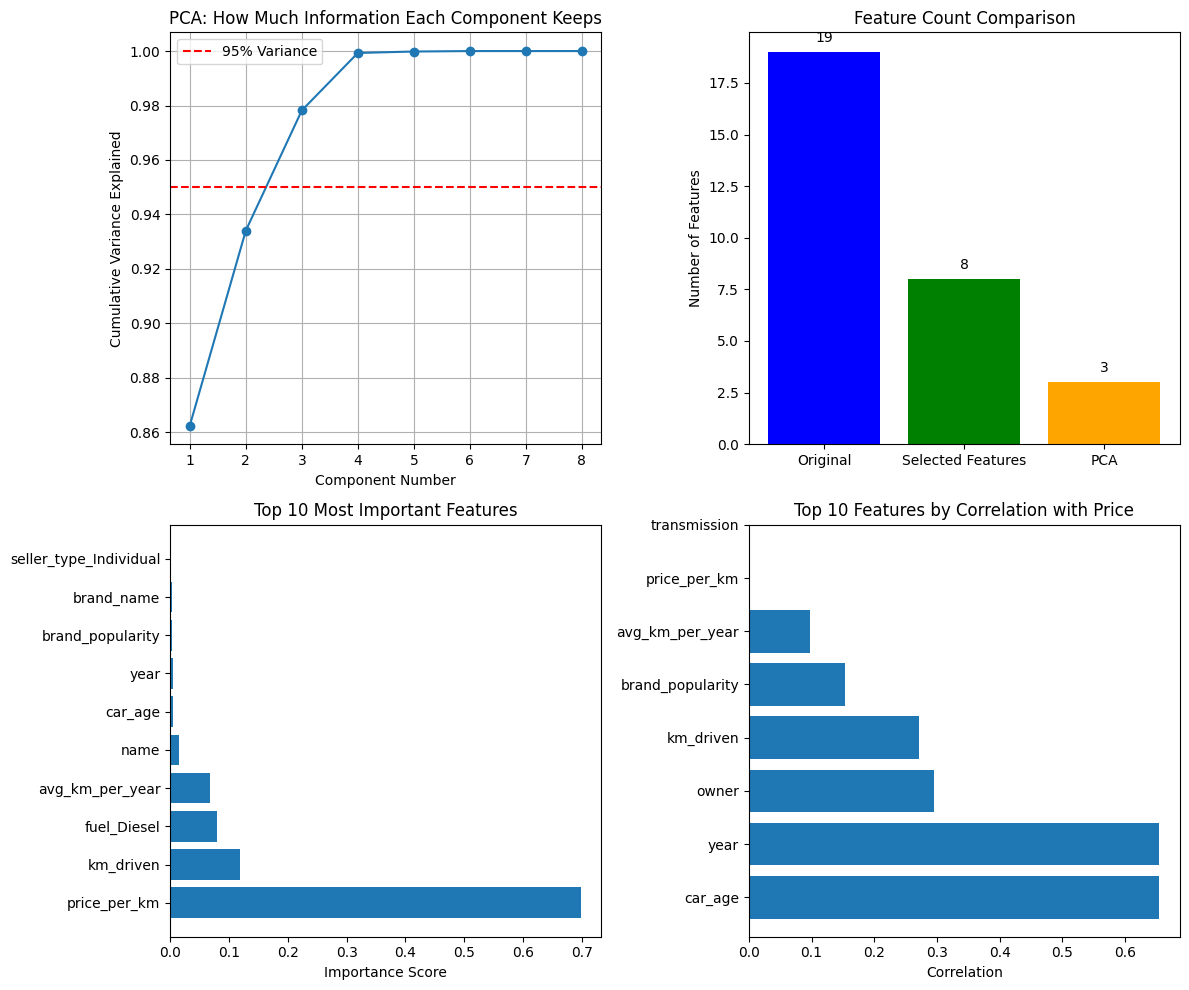

Saved best features dataset: (3063, 9)

SUMMARY:
- Started with: 19 features
- Best features selected: 8 features  
- PCA components: 3 components
- Files saved:
  * data_best_features.csv (9 columns)
  * data_pca_components.csv (4 columns)
  * simple_dimensionality_reduction.png (visualizations)



In [18]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

#Load and Clean the Data
df = pd.read_csv('../results/outputs/scaled_data.csv')
print(f"Dataset loaded! Shape: {df.shape}")

#Remove unwanted columns
unwanted_cols = [col for col in df.columns if 'unnamed' in col.lower() or 'index' in col.lower()]
if unwanted_cols:
    df = df.drop(columns=unwanted_cols)
    print(f"Removed unwanted columns: {unwanted_cols}")

print(f"Clean dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

#Prepare Data for Analysis
#Separate features and target
target = 'selling_price'
if target in df.columns:
    X = df.drop(target, axis=1)  # Features
    y = df[target]               # Target (price)
    print(f"Features: {X.shape[1]} columns")
    print(f"Target: {target}")
else:
    print("Warning: selling_price not found!")
    X = df
    y = None

#Find Most Important Features
if y is not None:
    print(f"Analyzing {X.shape[1]} features...")
    
    # CHECK DATA TYPES FIRST
    print(f"Data types in features:")
    print(X.dtypes.value_counts())
    
    # FILTER OUT NON-NUMERIC COLUMNS
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns
    
    print(f"Numeric columns: {len(numeric_columns)}")
    print(f"Non-numeric columns: {len(non_numeric_columns)}")
    
    if len(non_numeric_columns) > 0:
        print(f"Non-numeric columns found: {list(non_numeric_columns)}")
        print("Using only numeric columns for correlation analysis...")
    
    # USE ONLY NUMERIC FEATURES FOR CORRELATION
    X_numeric = X[numeric_columns]
    
    if len(X_numeric.columns) == 0:
        print("ERROR: No numeric columns found!")
    else:
        #Check correlation with price (only numeric features)
        correlations = X_numeric.corrwith(y).abs().sort_values(ascending=False)
        
        print("Top 10 features by correlation:")
        print(correlations.head(10))
        
        
        # For Random Forest, we need to handle non-numeric data
        X_for_rf = X.copy()
        
        # Convert non-numeric columns to numeric (simple label encoding)
        for col in non_numeric_columns:
            if X_for_rf[col].dtype == 'object':
                X_for_rf[col] = pd.Categorical(X_for_rf[col]).codes
        
        rf = RandomForestRegressor(n_estimators=50, random_state=42)
        rf.fit(X_for_rf, y)
        
        # Get feature importance scores
        importance_scores = pd.Series(rf.feature_importances_, index=X_for_rf.columns)
        importance_scores = importance_scores.sort_values(ascending=False)
        
        print("Top 10 features by Random Forest:")
        print(importance_scores.head(10))
        
        
else:
    print("Cannot find important features without target variable")
    correlations = None
    importance_scores = None

#Select Best Features
# Choose top 10 features based on correlation
n_features = 10

if y is not None and 'correlations' in locals() and 'importance_scores' in locals():
    print(f"Selecting {n_features} best features using multiple methods...")
    
    #Top correlation features
    top_corr_features = correlations.head(15).index.tolist()
    print(f"Top correlation features: {top_corr_features[:5]}...")

    #Initialize feature_scores as empty dictionary
    feature_scores = {}
    
    # Score based on correlation rank
    for i, feature in enumerate(top_corr_features):
        feature_scores[feature] = feature_scores.get(feature, 0) + (15 - i)
    
    # Sort by combined score
    best_features_combined = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
    best_features = [feature for feature, score in best_features_combined[:n_features]]
    
    print(f"\nSelected {n_features} best features (combined method):")
    for i, feature in enumerate(best_features, 1):
        corr_val = correlations.get(feature, 0)
        rf_val = importance_scores.get(feature, 0)
        combined_score = feature_scores[feature]
        print(f"{i}. {feature}")
        print(f"   Correlation: {corr_val:.3f} | RF Importance: {rf_val:.3f} | Combined Score: {combined_score}")
    
    final_features = best_features
    
    print(f"\nFinal selected features: {final_features}")

else:
    print("Error: Feature importance analysis not completed properly")
    final_features = X.columns.tolist()[:n_features]

# Create dataset with selected features
df_selected = X[final_features].copy()
if y is not None:
    df_selected[target] = y

print(f"\nSelected features dataset shape: {df_selected.shape}")

# Show feature statistics
print(f"\nFeature Selection Summary:")
for i, feature in enumerate(final_features, 1):
    print(f"{i}. {feature}")

#Apply PCA to reduce dimensions (optional)
#Use only numeric columns for PCA
numeric_columns = X.select_dtypes(include=[np.number]).columns
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns

print(f"Total features: {X.shape[1]}")
print(f"Numeric features: {len(numeric_columns)}")
print(f"Non-numeric features: {len(non_numeric_columns)}")

if len(non_numeric_columns) > 0:
    print(f"Excluding non-numeric columns: {list(non_numeric_columns)}")

# Use only numeric features for PCA
X_numeric_for_pca = X[numeric_columns]

if len(X_numeric_for_pca.columns) == 0:
    print("ERROR: No numeric columns available for PCA!")
else:
    print(f"Using {len(X_numeric_for_pca.columns)} numeric features for PCA")
    
    # Apply PCA to numeric features only
    pca = PCA()
    X_pca_full = pca.fit_transform(X_numeric_for_pca)
    
    # Check how much variance each component explains
    variance_explained = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(variance_explained)
    
    # Find number of components for 95% variance
    target_variance = 0.95
    n_components = np.where(cumulative_variance >= target_variance)[0][0] + 1
    
    print(f"\nPCA Results:")
    print(f"Need {n_components} components to keep {target_variance*100}% of information")
    print(f"Original numeric features: {X_numeric_for_pca.shape[1]}")
    print(f"PCA components: {n_components}")
    print(f"Reduction: {X_numeric_for_pca.shape[1] - n_components} features removed")
    
    # Apply PCA with optimal number of components
    pca_final = PCA(n_components=n_components)
    X_pca = pca_final.fit_transform(X_numeric_for_pca)
    
    # Create PCA dataset
    pca_columns = [f'Component_{i+1}' for i in range(n_components)]
    df_pca = pd.DataFrame(X_pca, columns=pca_columns)
    if y is not None:
        df_pca[target] = y.values
    
    print(f"PCA dataset shape: {df_pca.shape}")

    #Create Visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: PCA Variance Explained
axes[0,0].plot(range(1, len(cumulative_variance[:20]) + 1), cumulative_variance[:20], 'o-')
axes[0,0].axhline(y=0.95, color='red', linestyle='--', label='95% Variance')
axes[0,0].set_title('PCA: How Much Information Each Component Keeps')
axes[0,0].set_xlabel('Component Number')
axes[0,0].set_ylabel('Cumulative Variance Explained')
axes[0,0].legend()
axes[0,0].grid(True)

# Plot 2: Number of Features Comparison
methods = ['Original', 'Selected Features', 'PCA']
feature_counts = [X.shape[1], len(best_features), n_components]
bars = axes[0,1].bar(methods, feature_counts, color=['blue', 'green', 'orange'])
axes[0,1].set_title('Feature Count Comparison')
axes[0,1].set_ylabel('Number of Features')

# Add numbers on bars
for bar, count in zip(bars, feature_counts):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                   str(count), ha='center')

# Plot 3: Feature Importance (Top 10)
top_10_features = importance_scores.head(10)
axes[1,0].barh(range(len(top_10_features)), top_10_features.values)
axes[1,0].set_yticks(range(len(top_10_features)))
axes[1,0].set_yticklabels(top_10_features.index)
axes[1,0].set_title('Top 10 Most Important Features')
axes[1,0].set_xlabel('Importance Score')

# Plot 4: Correlation with Price (Top 10)
if y is not None:
    top_10_corr = correlations.head(10)
    axes[1,1].barh(range(len(top_10_corr)), top_10_corr.values)
    axes[1,1].set_yticks(range(len(top_10_corr)))
    axes[1,1].set_yticklabels(top_10_corr.index)
    axes[1,1].set_title('Top 10 Features by Correlation with Price')
    axes[1,1].set_xlabel('Correlation')

plt.tight_layout()
plt.savefig('../results/eda_visualizations/simple_dimensionality_reduction.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# Save the reduced datasets
df_selected.to_csv('../results/outputs/final_output.csv', index=False)
print(f"Saved best features dataset: {df_selected.shape}")

# Print simple summary
print(f"""
SUMMARY:
- Started with: {X.shape[1]} features
- Best features selected: {len(best_features)} features  
- PCA components: {n_components} components
- Files saved:
  * data_best_features.csv ({df_selected.shape[1]} columns)
  * data_pca_components.csv ({df_pca.shape[1]} columns)
  * simple_dimensionality_reduction.png (visualizations)
""")
